# Mapping Signal Groups

In [14]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import xarray as xr
import zarr
import pandas as pd
from src.archive.transforms import PipelineRegistry

def load_source(path):# -> dict[Any, Dataset]:
    store = zarr.open(path)
    keys = list(store.keys())
    dt = {key: xr.open_zarr(path + '/'+ key) for key in keys}
    return dt
    

def make_channel_df(dataset):
    items = []
    for key, ds in dataset.data_vars.items():
        item = dict(name=ds.attrs['uda_name'], description=ds.attrs['description'])
        items.append(item)

    df = pd.DataFrame(items)
    return df

def print_datasets(dt):
    for key, ds in dt.items():
        print(ds.sizes, key, ds.attrs['description'])

pipelines = PipelineRegistry()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ABM - Needs Review

In [15]:
source = 'abm'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset
# print_datasets(dataset)
# for key, ds in dataset.items():
#     print(ds.coords)

<xarray.Dataset> Size: 2MB
Dimensions:         (dim_0: 32, time: 7500, chord: 11)
Coordinates:
  * dim_0           (dim_0) float32 128B 1.0 2.0 3.0 4.0 ... 29.0 30.0 31.0 32.0
  * time            (time) float32 30kB -0.1 -0.0996 -0.0992 ... 2.899 2.899 2.9
  * chord           (chord) float32 44B 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
Data variables: (12/21)
    calib_shot      int16 2B dask.array<chunksize=(), meta=np.ndarray>
    channel_status  (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    channel_type    (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    gain            (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    i-bol           (time, dim_0) float32 960kB dask.array<chunksize=(7500, 32), meta=np.ndarray>
    km              (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    ...              ...
    taum            (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    tco_emis        (time, chord) float32 330kB dask.array<chunksize=(7500, 11), meta=np.ndarray>
    v-bol           (time, dim_0) float32 960kB dask.array<chunksize=(7500, 32), meta=np.ndarray>
    version         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    z-chords        (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>
    z-slits         (dim_0) float32 128B dask.array<chunksize=(32,), meta=np.ndarray>

### ADA

In [16]:
source = 'ada'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
# dataset = group_signals_by_source(source, dt)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 8MB
Dimensions:             (time: 886, dim_0: 1155, dim_1: 1024)
Coordinates:
  * time                (time) float32 4kB -0.09717 -0.09512 ... 0.6941 0.6962
  * dim_0               (dim_0) float32 5kB 0.1837 0.1849 0.1862 ... 1.608 1.609
  * dim_1               (dim_1) float32 4kB -0.2456 -0.2447 ... 1.123 1.124
Data variables:
    dalpha_integrated   (time) float32 4kB dask.array<chunksize=(886,), meta=np.ndarray>
    dalpha_inverted     (time, dim_0) float32 4MB dask.array<chunksize=(886, 1155), meta=np.ndarray>
    dalpha_peak_radius  (time) float32 4kB dask.array<chunksize=(886,), meta=np.ndarray>
    dalpha_raw_full     (time, dim_1) float32 4MB dask.array<chunksize=(886, 1024), meta=np.ndarray>
    geo_full            (dim_1) float32 4kB dask.array<chunksize=(1024,), meta=np.ndarray>
    inner_integrated    (time) float32 4kB dask.array<chunksize=(886,), meta=np.ndarray>
    inner_peak_radius   (time) float32 4kB dask.array<chunksize=(886,), meta=np.ndarray>
    passnumber          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status              float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ADG

In [17]:
source = 'adg'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 5kB
Dimensions:            (time: 388)
Coordinates:
  * time               (time) float32 2kB -0.09512 -0.09307 ... 0.6962 0.6982
Data variables:
    density_gradient   (time) float32 2kB dask.array<chunksize=(388,), meta=np.ndarray>
    gradient_position  (time) float32 2kB dask.array<chunksize=(388,), meta=np.ndarray>
    passnumber         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status             float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AGA

In [18]:
source = 'aga'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 13MB
Dimensions:         (time: 132812)
Coordinates:
  * time            (time) float32 531kB -2.5 -2.5 -2.5 -2.5 ... 10.2 10.2 10.2
Data variables: (12/25)
    bc11            (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    bc5             (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    fig             (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    fig_raw         (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    hecc            (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    helios          (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    ...              ...
    outboard_total  (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    passnumber      int32 4B dask.array<chunksize=(), meta=np.ndarray>
    status          int32 4B dask.array<chunksize=(), meta=np.ndarray>
    tc11            (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    tc5a            (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>
    tc5b            (time) float32 531kB dask.array<chunksize=(132812,), meta=np.ndarray>

### AHX

In [19]:
source = 'ahx'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 240kB
Dimensions:     (time: 15000)
Coordinates:
  * time        (time) float32 60kB -0.1 -0.0999 -0.0998 -0.0997 ... 1.4 1.4 1.4
Data variables:
    hxr_mezzw   (time) float32 60kB dask.array<chunksize=(15000,), meta=np.ndarray>
    hxr_s       (time) float32 60kB dask.array<chunksize=(15000,), meta=np.ndarray>
    hxr_w       (time) float32 60kB dask.array<chunksize=(15000,), meta=np.ndarray>
    passnumber  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version     float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AIM

In [22]:
source = 'aim'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 1MB
Dimensions:          (time: 50000)
Coordinates:
  * time             (time) float32 200kB -0.01 -0.00998 -0.00996 ... 0.99 0.99
Data variables:
    da_hm10_t        (time) float32 200kB dask.array<chunksize=(50000,), meta=np.ndarray>
    da_hm10_t_error  (time) float32 200kB dask.array<chunksize=(50000,), meta=np.ndarray>
    da_to10          (time) float32 200kB dask.array<chunksize=(50000,), meta=np.ndarray>
    da_to10_error    (time) float32 200kB dask.array<chunksize=(50000,), meta=np.ndarray>
    passnumber       int32 4B dask.array<chunksize=(), meta=np.ndarray>
    status           int32 4B dask.array<chunksize=(), meta=np.ndarray>

### AIR

In [23]:
source = 'air'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset
# for key, ds in dataset.items():
    # print(key, ds['time'].mean())


<xarray.Dataset> Size: 11MB
Dimensions:               (time: 3120, dim_0: 299)
Coordinates:
  * time                  (time) float32 12kB -0.04998 -0.04978 ... 0.4088
  * dim_0                 (dim_0) float32 1kB 0.8 0.8016 0.8032 ... 1.269 1.271
Data variables: (12/31)
    alphaconst_osp        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    alphaconst_osp_elm    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    camera_view_osp       float32 4B dask.array<chunksize=(), meta=np.ndarray>
    etot_osp              (time) float32 12kB dask.array<chunksize=(3120,), meta=np.ndarray>
    etot_osp_elm          (time) float32 12kB dask.array<chunksize=(3120,), meta=np.ndarray>
    etotsum_osp           (time) float32 12kB dask.array<chunksize=(3120,), meta=np.ndarray>
    ...                    ...
    status                float32 4B dask.array<chunksize=(), meta=np.ndarray>
    svn_revision          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    temperature_osp       (time) float32 12kB dask.array<chunksize=(3120,), meta=np.ndarray>
    tprofile_osp          (time, dim_0) float32 4MB dask.array<chunksize=(3120, 299), meta=np.ndarray>
    z_extent_osp          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    z_start_osp           float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AIT

In [24]:
source = 'ait'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 17MB
Dimensions:               (time: 3161, dim_0: 214)
Coordinates:
  * time                  (time) float32 13kB -0.04995 -0.04975 ... 0.4089
  * dim_0                 (dim_0) float32 856B 0.8 0.8063 0.8126 ... 1.815 1.82
Data variables: (12/59)
    alphaconst_isp        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    alphaconst_isp_elm    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    alphaconst_osp        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    alphaconst_osp_elm    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    camera_view_isp       float32 4B dask.array<chunksize=(), meta=np.ndarray>
    camera_view_osp       float32 4B dask.array<chunksize=(), meta=np.ndarray>
    ...                    ...
    tprofile_isp          (time, dim_0) float32 3MB dask.array<chunksize=(3161, 214), meta=np.ndarray>
    tprofile_osp          (time, dim_0) float32 3MB dask.array<chunksize=(3161, 214), meta=np.ndarray>
    z_extent_isp          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    z_extent_osp          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    z_start_isp           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    z_start_osp           float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ALP - needs review

In [25]:
source = 'alp'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

pipelines = PipelineRegistry()
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset
# print_datasets(dataset)
# for key, ds in dataset.items():
#     print(ds.coords)


<xarray.Dataset> Size: 3MB
Dimensions:                    (time: 288, npts_inner: 32, npts_outer: 64)
Coordinates:
  * time                       (time) float32 1kB 0.1504 0.1514 ... 0.4489
Dimensions without coordinates: npts_inner, npts_outer
Data variables: (12/105)
    badamps                    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    inner_lo_chisq             (time, npts_inner) float32 37kB dask.array<chunksize=(288, 32), meta=np.ndarray>
    inner_lo_denpeakval        (time) float32 1kB dask.array<chunksize=(288,), meta=np.ndarray>
    inner_lo_density           (time, npts_inner) float32 37kB dask.array<chunksize=(288, 32), meta=np.ndarray>
    inner_lo_density_error     (time, npts_inner) float32 37kB dask.array<chunksize=(288, 32), meta=np.ndarray>
    inner_lo_jsapeakpos        (time) float32 1kB dask.array<chunksize=(288,), meta=np.ndarray>
    ...                         ...
    outer_up_timemid           (time, npts_outer) float32 74kB dask.array<chunksize=(288, 64), meta=np.ndarray>
    outer_up_vfloat            (time, npts_outer) float32 74kB dask.array<chunksize=(288, 64), meta=np.ndarray>
    outer_up_vfloat_error      (time, npts_outer) float32 74kB dask.array<chunksize=(288, 64), meta=np.ndarray>
    outer_up_z                 (npts_outer) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    passnumber                 float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status                     float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AMA

In [26]:
source = 'ama'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 18MB
Dimensions:          (time: 650000)
Coordinates:
  * time             (time) float32 3MB -0.1 -0.1 -0.1 -0.09999 ... 1.2 1.2 1.2
Data variables:
    n=2_amplitude    (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    n=2_frequency    (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    n=2_signal       (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    n=odd_amplitude  (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    n=odd_frequency  (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    n=odd_signal     (time) float32 3MB dask.array<chunksize=(650000,), meta=np.ndarray>
    passnumber       float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version          float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AMB - Needs Review

AMB needs further tensorising to combine channels. Also requires including mapping r and z coordinates

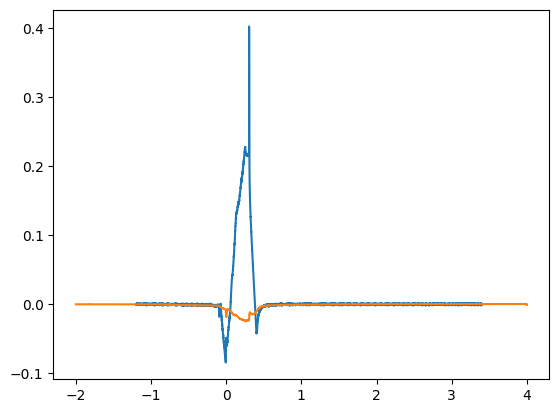

In [28]:
source = 'amb'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)

pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)

ds = dataset['ccbv'].dropna(dim='time')
plt.plot(ds.time, ds.values[0])

ds = dataset['obv'].dropna(dim='time')
plt.plot(ds.time, ds.values[0])

### AMC - Needs Review

In [29]:
source = 'amc'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

# df = make_channel_df(dataset)
# df.to_csv('amc.csv')

<xarray.Dataset> Size: 5MB
Dimensions:            (time: 30000)
Coordinates:
  * time               (time) float32 120kB -2.0 -2.0 -2.0 ... 3.999 4.0 4.0
Data variables: (12/46)
    efps_current       (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    error_field_02     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    error_field_05     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2il_coil_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2il_feed_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2iu_coil_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    ...                 ...
    p6u_current        (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    plasma_current     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    sol_current        (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    status             float32 4B dask.array<chunksize=(), meta=np.ndarray>
    tf_current         (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    version            float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AMH - Needs Review

AMH also needs further tensorising, but we should check with Lucy about groups.

In [30]:
source = 'amh'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'

dt = load_source(path)
# dataset = group_signals_by_source(source, dt)
dataset = pipelines.get(source)(dt)
dataset

# df = make_channel_df(dataset)
# df.to_csv('amh.csv')

<xarray.Dataset> Size: 537kB
Dimensions:              (time: 2200)
Coordinates:
  * time                 (time) float32 9kB 0.289 0.289 0.289 ... 0.329 0.329
Data variables: (12/63)
    halo_ccu_2           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    halo_p2l_1           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    halo_p2l_2           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    halo_p2l_3           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    halo_p2l_4           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    halo_p2l_5           (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    ...                   ...
    phalo_sum_p2l_inner  (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    phalo_sum_p2l_outer  (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    phalo_sum_p2u_inner  (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    phalo_sum_p2u_outer  (time) float32 9kB dask.array<chunksize=(2200,), meta=np.ndarray>
    status               float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version              float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AMM - Needs Review

Another source that can be hevily tensorized

In [31]:
source = 'amm'
path = f'/common/tmp/sjackson/local_cache2/30420.zarr/{source}'
dt = load_source(path)
# dataset = group_signals_by_source(source, dt)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

# df = make_channel_df(dataset)
# df.to_csv('amm.csv')

<xarray.Dataset> Size: 19MB
Dimensions:        (time: 30000, incon_channel: 10, mid_channel: 12,
                    ring_channel: 10, rodgr_channel: 12, vertw_channel: 8,
                    lhorw_channel: 6, uhorw_channel: 6)
Coordinates:
  * time           (time) float32 120kB -2.0 -2.0 -2.0 ... 4.0 4.001 4.001
  * incon_channel  (incon_channel) <U7 280B 'incon1' 'incon2' ... 'incon10'
  * mid_channel    (mid_channel) <U5 240B 'mid1' 'mid2' ... 'mid11' 'mid12'
  * ring_channel   (ring_channel) <U6 240B 'ring1' 'ring2' ... 'ring9' 'ring10'
  * rodgr_channel  (rodgr_channel) <U7 336B 'rodgr1' 'rodgr2' ... 'rodgr12'
  * vertw_channel  (vertw_channel) <U6 192B 'vertw1' 'vertw2' ... 'vertw8'
  * lhorw_channel  (lhorw_channel) <U6 144B 'lhorw1' 'lhorw2' ... 'lhorw6'
  * uhorw_channel  (uhorw_channel) <U6 144B 'uhorw1' 'uhorw2' ... 'uhorw6'
Data variables: (12/25)
    botcol         (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    endcrown_l     (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    endcrown_u     (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2larm1        (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2larm2        (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2larm3        (time) float64 240kB dask.array<chunksize=(30000,), meta=np.ndarray>
    ...             ...
    mid            (mid_channel, time) float64 3MB dask.array<chunksize=(12, 30000), meta=np.ndarray>
    ring           (ring_channel, time) float64 2MB dask.array<chunksize=(10, 30000), meta=np.ndarray>
    rodgr          (rodgr_channel, time) float64 3MB dask.array<chunksize=(12, 30000), meta=np.ndarray>
    vertw          (vertw_channel, time) float64 2MB dask.array<chunksize=(8, 30000), meta=np.ndarray>
    lhorw          (lhorw_channel, time) float64 1MB dask.array<chunksize=(6, 30000), meta=np.ndarray>
    uhorw          (uhorw_channel, time) float64 1MB dask.array<chunksize=(6, 30000), meta=np.ndarray>

### AMS

In [32]:
source = 'ams'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 505MB
Dimensions:                 (dim_0: 2219, dim_1: 30, time: 2366)
Coordinates:
  * dim_0                   (dim_0) float32 9kB 0.0 1.0 ... 2.217e+03 2.218e+03
  * dim_1                   (dim_1) float32 120B 0.0 1.0 2.0 ... 27.0 28.0 29.0
  * time                    (time) float32 9kB -0.047 -0.0465 ... 0.597 0.5975
Data variables: (12/57)
    acoeff                  (dim_0, dim_1) float32 266kB dask.array<chunksize=(2219, 30), meta=np.ndarray>
    beam_ok                 float32 4B dask.array<chunksize=(), meta=np.ndarray>
    ch                      (dim_0) float32 9kB dask.array<chunksize=(2219,), meta=np.ndarray>
    cosbeam                 (dim_0) float32 9kB dask.array<chunksize=(2219,), meta=np.ndarray>
    cpf                     (time, dim_0) float32 21MB dask.array<chunksize=(2366, 2219), meta=np.ndarray>
    cpf_error               (time, dim_0) float32 21MB dask.array<chunksize=(2366, 2219), meta=np.ndarray>
    ...                      ...
    status                  int32 4B dask.array<chunksize=(), meta=np.ndarray>
    trans                   (dim_0) float32 9kB dask.array<chunksize=(2219,), meta=np.ndarray>
    version                 float32 4B dask.array<chunksize=(), meta=np.ndarray>
    viewstr                 (dim_0) float32 9kB dask.array<chunksize=(2219,), meta=np.ndarray>
    vx0                     (dim_0, dim_1) float32 266kB dask.array<chunksize=(2219, 30), meta=np.ndarray>
    vy0                     (dim_0, dim_1) float32 266kB dask.array<chunksize=(2219, 30), meta=np.ndarray>

### ANB

In [33]:
source = 'anb'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 10MB
Dimensions:                     (time: 99921)
Coordinates:
  * time                        (time) float64 799kB -0.5 -0.5 ... 2.0 2.0
Data variables: (12/24)
    passnumber                  int32 4B dask.array<chunksize=(), meta=np.ndarray>
    ss_full_power               (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    ss_full_power_error         (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    ss_half_power               (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    ss_half_power_error         (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    ss_source_gas_deuter        (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    ...                          ...
    sw_sum_power                (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    sw_sum_power_error          (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    sw_third_power              (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    sw_third_power_error        (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    tot_sum_power               (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>
    tot_sum_power_error         (time) float32 400kB dask.array<chunksize=(99921,), meta=np.ndarray>

### ANE

In [34]:
source = 'ane'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset


<xarray.Dataset> Size: 524kB
Dimensions:        (time: 32768)
Coordinates:
  * time           (time) float32 131kB -0.01 -0.00996 -0.00992 ... 1.301 1.301
Data variables:
    co2            (time) float32 131kB dask.array<chunksize=(32768,), meta=np.ndarray>
    density        (time) float32 131kB dask.array<chunksize=(32768,), meta=np.ndarray>
    hene           (time) float32 131kB dask.array<chunksize=(32768,), meta=np.ndarray>
    passnumber     float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status_detail  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version        float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ANT

In [35]:
source = 'ant'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset


<xarray.Dataset> Size: 16B
Dimensions:       ()
Data variables:
    neutron_dose  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    passnumber    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version       float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ANU

In [36]:
source = 'anu'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 5MB
Dimensions:         (time: 194512)
Coordinates:
  * time            (time) float32 778kB -0.1025 -0.1 -0.09999 ... 1.388 1.393
Data variables:
    errors          (time) float32 778kB dask.array<chunksize=(194512,), meta=np.ndarray>
    neutrons        (time) float32 778kB dask.array<chunksize=(194512,), meta=np.ndarray>
    neutrons_cb     (time) float32 778kB dask.array<chunksize=(194512,), meta=np.ndarray>
    neutrons_count  (time) float32 778kB dask.array<chunksize=(194512,), meta=np.ndarray>
    neutrons_dc     (time) float32 778kB dask.array<chunksize=(194512,), meta=np.ndarray>
    passnumber      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version         float32 4B dask.array<chunksize=(), meta=np.ndarray>

### AOE - Needs Review

Requires further work! Time ranges are different!

In [37]:
source = 'aoe'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)

pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 30MB
Dimensions:     (time: 757862)
Coordinates:
  * time        (time) float32 3MB 2.384e-07 2.238e-06 ... 0.5243 0.5243
Data variables:
    co2_frac    (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    fast_k      (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    fast_ka     (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    fast_sync   (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    fast_u      (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    k_band      (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    ka_band     (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    passnumber  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    ramping     (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    status      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    u_band      (time) float32 3MB dask.array<chunksize=(757862,), meta=np.ndarray>
    version     float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ARP

In [38]:
source = 'arp'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 177304)
Coordinates:
  * time         (time) float32 709kB 0.15 0.15 0.15 ... 0.2914 0.2914 0.2914
Data variables:
    passnumber   float32 4B dask.array<chunksize=(), meta=np.ndarray>
    rp_gap_efit  (time) float32 709kB dask.array<chunksize=(177304,), meta=np.ndarray>
    rp_radius    (time) float32 709kB dask.array<chunksize=(177304,), meta=np.ndarray>
    status       float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ASB

In [39]:
source = 'asb'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 636B
Dimensions:       (time: 52)
Coordinates:
  * time          (time) float32 208B -0.015 0.002204 0.01941 ... 0.8452 0.8624
Data variables:
    cii_dga       (time) float32 208B dask.array<chunksize=(52,), meta=np.ndarray>
    oii_dga       (time) float32 208B dask.array<chunksize=(52,), meta=np.ndarray>
    passnumber    int32 4B dask.array<chunksize=(), meta=np.ndarray>
    status        int32 4B dask.array<chunksize=(), meta=np.ndarray>
    svn_revision  float32 4B dask.array<chunksize=(), meta=np.ndarray>

### ASM - Needs Review
Another one which needs to be tensorized

In [41]:
source = 'asm'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset
# df = make_channel_df(dataset)
# df.to_csv('asm.csv')

<xarray.Dataset> Size: 3MB
Dimensions:              (time: 32163, sad_m_channel: 11)
Coordinates:
  * time                 (time) float32 129kB -2.0 -2.0 -2.0 ... 4.0 4.001 4.001
  * sad_m_channel        (sad_m_channel) <U8 352B 'sad_m01' ... 'sad_m012'
Data variables: (12/16)
    hm_periods           (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    hm_rating            (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    out_nn_pattern       (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    out_nn_rating        (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    out_rating           (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    out_signal           (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    ...                   ...
    sad_d02_2-8          (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    sad_d03_4-10         (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    sad_d04_5-11         (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    sad_d05_6-12         (time) float32 129kB dask.array<chunksize=(32163,), meta=np.ndarray>
    status               float32 4B dask.array<chunksize=(), meta=np.ndarray>
    sad_m                (sad_m_channel, time) float32 1MB dask.array<chunksize=(11, 32163), meta=np.ndarray>

### ASX - Needs Review

Time has two values, but these differ between variables.

In [42]:
source = 'asx'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)

dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 88B
Dimensions:               (npts: 2)
Dimensions without coordinates: npts
Data variables:
    elm_freqs             (npts) float32 8B -0.01 -0.00998
    elmy                  (npts) float32 8B -0.01 -0.00998
    large_scale           (npts) float32 8B 0.0 0.0
    low_cam_nos_sawt_inv  (npts) float32 8B 0.0 0.0
    lower_false_inv_rad   (npts) float32 8B 0.0 0.0
    modes                 (npts) float32 8B 0.0 0.0
    passnumber            int32 4B dask.array<chunksize=(), meta=np.ndarray>
    sawteeth              (npts) float32 8B 0.0 0.0
    sawtooth_periods      (npts) float32 8B 0.0 0.0
    status                int32 4B dask.array<chunksize=(), meta=np.ndarray>
    up_cam_nos_sawt_inv   (npts) float32 8B 0.0 0.0
    upper_false_inv_rad   (npts) float32 8B 0.0 0.0

### AYC

In [43]:
source = 'ayc'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 3MB
Dimensions:               (time: 138, arb: 130, radial_index: 130,
                           spectral_index: 4)
Coordinates:
  * time                  (time) float32 552B 0.0 0.00416 0.00832 ... 67.0 68.0
  * arb                   (arb) float32 520B 0.0 1.0 2.0 ... 127.0 128.0 129.0
  * radial_index          (radial_index) float32 520B 1.0 2.0 ... 129.0 130.0
  * spectral_index        (spectral_index) float32 16B 1.0 2.0 3.0 4.0
Data variables: (12/39)
    acqiris_time          (time) float32 552B dask.array<chunksize=(138,), meta=np.ndarray>
    angle                 (arb) float32 520B dask.array<chunksize=(130,), meta=np.ndarray>
    aspectra              (time, radial_index, spectral_index) float32 287kB dask.array<chunksize=(138, 130, 4), meta=np.ndarray>
    chi2                  (time, radial_index) float32 72kB dask.array<chunksize=(138, 130), meta=np.ndarray>
    covariance_ne_te      (time, radial_index) float32 72kB dask.array<chunksize=(138, 130), meta=np.ndarray>
    instrument_dr         (time, radial_index) float32 72kB dask.array<chunksize=(138, 130), meta=np.ndarray>
    ...                    ...
    version_fibre         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_poly          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_raman         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_spectrometer  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    xyc_time              (time) float32 552B dask.array<chunksize=(138,), meta=np.ndarray>
    yag_nelint            (time) float32 552B dask.array<chunksize=(138,), meta=np.ndarray>

### AYE

In [44]:
source = 'aye'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 357kB
Dimensions:               (arb: 16, radial_index: 16, spectral_index: 4,
                           time: 138)
Coordinates:
  * arb                   (arb) float32 64B 0.0 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * radial_index          (radial_index) float32 64B 1.0 2.0 3.0 ... 15.0 16.0
  * spectral_index        (spectral_index) float32 16B 1.0 2.0 3.0 4.0
  * time                  (time) float32 552B 0.0 0.00416 0.00832 ... 67.0 68.0
Data variables: (12/34)
    angle                 (arb) float32 64B dask.array<chunksize=(16,), meta=np.ndarray>
    aspectra              (time, radial_index, spectral_index) float32 35kB dask.array<chunksize=(138, 16, 4), meta=np.ndarray>
    chi2                  (time, radial_index) float32 9kB dask.array<chunksize=(138, 16), meta=np.ndarray>
    covariance_ne_te      (time, radial_index) float32 9kB dask.array<chunksize=(138, 16), meta=np.ndarray>
    gauss_amplitude       (time, radial_index, spectral_index) float32 35kB dask.array<chunksize=(138, 16, 4), meta=np.ndarray>
    gauss_dclevel         (time, radial_index, spectral_index) float32 35kB dask.array<chunksize=(138, 16, 4), meta=np.ndarray>
    ...                    ...
    te_error              (time, radial_index) float32 9kB dask.array<chunksize=(138, 16), meta=np.ndarray>
    time_                 (time) float32 552B dask.array<chunksize=(138,), meta=np.ndarray>
    version_fibre         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_poly          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_raman         float32 4B dask.array<chunksize=(), meta=np.ndarray>
    version_spectrometer  float32 4B dask.array<chunksize=(), meta=np.ndarray>

### EFM - Needs Review
Needs more work

0 -1 is normalised psi

psi - psi_norm - areap_c
dim_0 - num_iterations - chisq_magnetic
psi - psi_norm -  elongpsi_c
dim_0 - fcoil_segs_n - fcoil_ang1
dim_0 - fcoil_segs_n - fcoil_ang2
dim_0 - fcoil_n - fcoil_c
dim_0 - fcoil_n - fcoil_chisq
dim_0 - ffprime_coefs_n - ffprime_coefs
dim_0 - magpr_n - fwtmp
dim_0 - silop_n - fwtsi
dim_0 - nr - gridr
dim_0 - nz - gridz
r - nr_prof - jr
dim_0 - limiter_n - limiterr
dim_0 - limiter_n - limiterz
dim_0 - magpr_n - magpr_ang
z/r - nz/nr - plasma_currrz

pprime_coefs - as ffprime
r - nr_prof - pr_c
r - nr_prof - psir
height/radius - nz/nr - psirz
psi - psi_norm - pwpsi_c
r - nr_prof - qr
r - nr_prof - rvals - rvals for the radial profiles

dim_0 - silop_n - silop_c
dim_0 - silop_n - silop_chisq

In [45]:
source = 'efm'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)

pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

# # df = pd.DataFrame(items)
# # df.to_csv('efm.csv')

<xarray.Dataset> Size: 4MB
Dimensions:               (time: 66, psi_norm: 65, n_iterations: 10,
                           fcoil_seg_n: 938, fcoil_n: 101, ffprime_coefs_n: 2,
                           magpr_n: 78, silop_n: 46, nr: 65, nz: 65,
                           nprof_r: 129, lcfs_coords: 139, limiter_n: 37,
                           pprime_coefs_n: 2, nprof_z: 65)
Coordinates: (12/13)
  * time                  (time) float32 264B -0.05 -0.045 -0.04 ... 0.3 0.305
  * psi_norm              (psi_norm) float32 260B 0.0 0.01562 ... 0.9844 1.0
  * n_iterations          (n_iterations) float32 40B 0.0 1.0 2.0 ... 7.0 8.0 9.0
  * fcoil_n               (fcoil_n) float32 404B 0.0 1.0 2.0 ... 98.0 99.0 100.0
  * ffprime_coefs_n       (ffprime_coefs_n) float32 8B 0.0 1.0
  * magpr_n               (magpr_n) float32 312B 0.0 1.0 2.0 ... 75.0 76.0 77.0
    ...                    ...
  * nr                    (nr) float32 260B 0.06 0.09031 0.1206 ... 1.97 2.0
  * nz                    (nz) float32 260B -2.0 -1.938 -1.875 ... 1.938 2.0
  * nprof_r               (nprof_r) float32 516B 0.0 0.01562 ... 1.97 2.0
  * lcfs_coords           (lcfs_coords) float32 556B 0.0 1.0 2.0 ... 137.0 138.0
  * pprime_coefs_n        (pprime_coefs_n) float32 8B 0.0 1.0
  * nprof_z               (nprof_z) float32 260B -2.0 -1.938 ... 1.938 2.0
Dimensions without coordinates: fcoil_seg_n, limiter_n
Data variables: (12/152)
    all_times             (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    areap_c               (time, psi_norm) float32 17kB dask.array<chunksize=(66, 65), meta=np.ndarray>
    betan                 (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    betap                 (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    betapd                (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    betat                 (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    ...                    ...
    wpol                  (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    xpoint1_rc            (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    xpoint1_zc            (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    xpoint2_rc            (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    xpoint2_zc            (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>
    zbdry                 (time) float32 264B dask.array<chunksize=(66,), meta=np.ndarray>

### ESM - Needs Review

ibmp1_r_larmor and similar can be dropped if unity.

In [46]:
source = 'esm'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'

dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset
# for key, ds in dataset.items():
#     print(key, ds.squeeze().coords)

# df = pd.DataFrame(items)
# df.to_csv('esm.csv')

<xarray.Dataset> Size: 44MB
Dimensions:               (time: 33827, fit_quality_n: 2, radius: 130)
Coordinates:
  * time                  (time) float32 135kB -0.01 -0.00996 ... 1.517 1.517
  * fit_quality_n         (fit_quality_n) float32 8B -999.0 -1e+03
  * radius                (radius) float32 520B 0.0 1.0 2.0 ... 128.0 129.0
Data variables: (12/79)
    area_outin_ratio      (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    av_t                  float32 4B dask.array<chunksize=(), meta=np.ndarray>
    dr_sep_in             (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    dr_sep_out            (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    efm_comb_ratingav     (fit_quality_n) float32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    efm_comb_ratingmin    (fit_quality_n) float32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    v_ion                 float32 4B dask.array<chunksize=(), meta=np.ndarray>
    v_ion_multi           (time, radius) float32 18MB dask.array<chunksize=(33827, 130), meta=np.ndarray>
    v_loop_dynamic        (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    v_loop_static         (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    w_dot                 (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>
    x                     (time) float32 135kB dask.array<chunksize=(33827,), meta=np.ndarray>

### ESX

In [47]:
source = 'esx'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
# dataset = group_signals_by_source(source, dt)
# dataset
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 28B
Dimensions:           (time: 1)
Coordinates:
  * time              (time) float32 4B 0.0
Data variables:
    lower_inv_psi     (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    lower_inv_radius  (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    passnumber        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    status            float32 4B dask.array<chunksize=(), meta=np.ndarray>
    upper_inv_psi     (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    upper_inv_radius  (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>

### XDC

In [48]:
source = 'xdc'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 332MB
Dimensions:                   (time: 40000, ai_ccbv_channel: 40,
                               ai_flcc_channel: 10, ai_incon_channel: 10,
                               ai_lhorw_channel: 6, ai_mid_channel: 12,
                               ai_obr_channel: 19, ai_obv_channel: 19,
                               ai_ring_channel: 10, ai_rodgr_channel: 12,
                               ai_uhorw_channel: 6, ai_vertw_channel: 8,
                               ...
                               isoflux_t_seg_td_channel: 13,
                               isoflux_t_seg_ti_channel: 13,
                               isoflux_t_seg_tp_channel: 13,
                               isoflux_t_seg_u_channel: 18,
                               isoflux_t_zpsh_n_channel: 18,
                               isoflux_t_zpsh_p_channel: 18)
Coordinates: (12/14)
  * time                      (time) float64 320kB -2.0 -2.0 -2.0 ... 2.0 2.0
  * isoflux_e_seg_channel     (isoflux_e_seg_channel) <U15 780B 'isoflux_e_se...
  * isoflux_t_rpsh_n_channel  (isoflux_t_rpsh_n_channel) <U17 1kB 'isoflux_t_...
  * isoflux_t_rpsh_p_channel  (isoflux_t_rpsh_p_channel) <U17 1kB 'isoflux_t_...
  * isoflux_t_seg_channel     (isoflux_t_seg_channel) <U15 1kB 'isoflux_t_seg...
  * isoflux_t_seg_gd_channel  (isoflux_t_seg_gd_channel) <U17 884B 'isoflux_t...
    ...                        ...
  * isoflux_t_seg_td_channel  (isoflux_t_seg_td_channel) <U17 884B 'isoflux_t...
  * isoflux_t_seg_ti_channel  (isoflux_t_seg_ti_channel) <U17 884B 'isoflux_t...
  * isoflux_t_seg_tp_channel  (isoflux_t_seg_tp_channel) <U17 884B 'isoflux_t...
  * isoflux_t_seg_u_channel   (isoflux_t_seg_u_channel) <U16 1kB 'isoflux_t_s...
  * isoflux_t_zpsh_n_channel  (isoflux_t_zpsh_n_channel) <U17 1kB 'isoflux_t_...
  * isoflux_t_zpsh_p_channel  (isoflux_t_zpsh_p_channel) <U17 1kB 'isoflux_t_...
Dimensions without coordinates: ai_ccbv_channel, ai_flcc_channel,
                                ai_incon_channel, ai_lhorw_channel,
                                ai_mid_channel, ai_obr_channel, ai_obv_channel,
                                ai_ring_channel, ai_rodgr_channel,
                                ai_uhorw_channel, ai_vertw_channel, ai_ccbv,
                                equil_seg_channel
Data variables: (12/996)
    ai_cpu1_botcol            (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ai_cpu1_camera_ok         (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ai_cpu1_co2               (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ai_cpu1_endcrown_l        (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ai_cpu1_endcrown_u        (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ai_cpu1_flp2l1            (time) float32 160kB dask.array<chunksize=(40000,), meta=np.ndarray>
    ...                        ...
    isoflux_t_seg_td          (isoflux_t_seg_td_channel, time) float32 2MB dask.array<chunksize=(13, 40000), meta=np.ndarray>
    isoflux_t_seg_ti          (isoflux_t_seg_ti_channel, time) float32 2MB dask.array<chunksize=(13, 40000), meta=np.ndarray>
    isoflux_t_seg_tp          (isoflux_t_seg_tp_channel, time) float32 2MB dask.array<chunksize=(13, 40000), meta=np.ndarray>
    isoflux_t_seg_u           (isoflux_t_seg_u_channel, time) float64 6MB dask.array<chunksize=(18, 40000), meta=np.ndarray>
    isoflux_t_zpsh_n          (isoflux_t_zpsh_n_channel, time) float32 3MB dask.array<chunksize=(18, 40000), meta=np.ndarray>
    isoflux_t_zpsh_p          (isoflux_t_zpsh_p_channel, time) float32 3MB dask.array<chunksize=(18, 40000), meta=np.ndarray>

### XMO

In [132]:
source = 'xmo'
path = f'/common/tmp/sjackson/local_cache2/29790.zarr/{source}'
dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 101MB
Dimensions:                        (dim_0: 16, dim_1: 2, time: 1400000)
Coordinates:
  * dim_0                          (dim_0) int32 64B 0 1 2 3 4 ... 12 13 14 15
  * dim_1                          (dim_1) int32 8B 0 1
  * time                           (time) float64 11MB -0.1 -0.1 ... 0.6 0.6
Data variables: (12/18)
    devices_d3_acq216_025_channel  (dim_0) int32 64B dask.array<chunksize=(16,), meta=np.ndarray>
    devices_d3_acq216_025_range    (dim_0, dim_1) float32 128B dask.array<chunksize=(16, 2), meta=np.ndarray>
    devices_limit                  (dim_0) float64 128B dask.array<chunksize=(16,), meta=np.ndarray>
    omaha_1lz                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_2lt                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_2lz                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    ...                             ...
    omaha_5lz                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_5ur                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_5ut                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_5uz                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    omaha_6lz                      (time) float32 6MB dask.array<chunksize=(1400000,), meta=np.ndarray>
    time1                          (time) float64 11MB dask.array<chunksize=(1400000,), meta=np.ndarray>

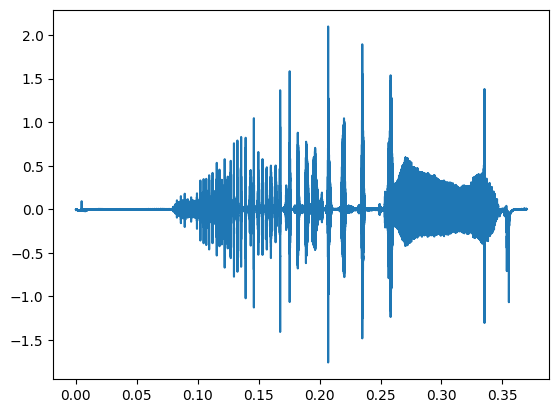

In [180]:
ds = dataset['omaha_3lz']
ds = ds.isel(time=(ds.time > 0) & (ds.time < .37))
plt.plot(ds.time, ds)

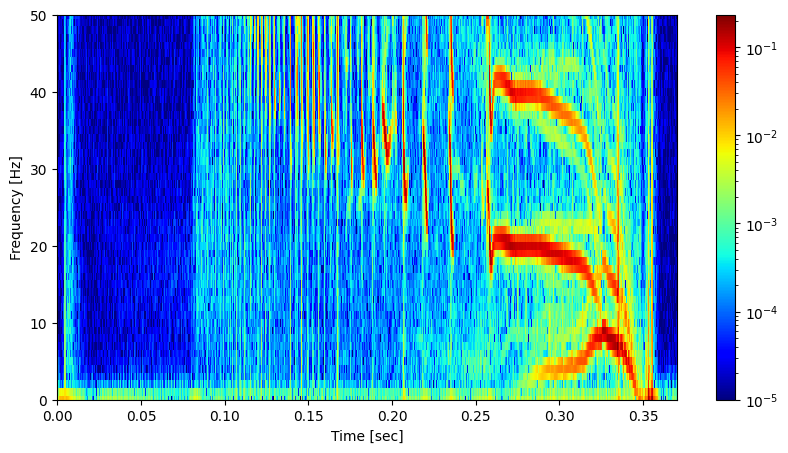

In [206]:
import numpy as np
from scipy.signal import stft
from matplotlib.colors import LogNorm

# Parameters to limit the number of frequencies
nperseg = 2000  # Number of points per segment
nfft = 2000  # Number of FFT points

# Compute the Short-Time Fourier Transform (STFT)
sample_rate = 1/(ds.time[1] - ds.time[0])
f, t, Zxx = stft(ds, fs=int(sample_rate), nperseg=nperseg, nfft=nfft)

fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.pcolormesh(t, f/1000, np.abs(Zxx), shading='nearest', cmap='jet', norm=LogNorm(vmin=1e-5))
ax.set_ylim(0, 50)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.colorbar(cax, ax=ax)

### XPC

In [53]:
source = 'xpc'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 40MB
Dimensions:           (time: 134750)
Coordinates:
  * time              (time) float32 539kB -0.1 -0.1 -0.09999 ... 1.499 1.5 1.5
Data variables: (12/74)
    a14_0116#06       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    a14_0118#03       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    a14_0118#06       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    chfs_drive        (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    clamp_p1_drive    (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    clamp_p2_drive    (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    ...                ...
    trcf_0104_16      (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    trcf_0104_5       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    trcf_0104_6       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    trcf_0104_9       (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    z_d_f_b           (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>
    zip_velocity      (time) float32 539kB dask.array<chunksize=(134750,), meta=np.ndarray>

### XSX

In [50]:
source = 'xsx'
path = f'/common/tmp/sjackson/local_cache2/30397.zarr/{source}'
dt = load_source(path)
pipelines = PipelineRegistry()
dataset = pipelines.get(source)(dt)
dataset

<xarray.Dataset> Size: 138MB
Dimensions:                          (time: 300000, dim_0: 96, dim_1: 2,
                                      hcam_l_channel: 36, hcam_u_channel: 36,
                                      tcam_channel: 36)
Coordinates:
  * time                             (time) float64 2MB -0.009999 ... 0.59
  * dim_0                            (dim_0) int32 384B 0 1 2 3 ... 92 93 94 95
  * dim_1                            (dim_1) int32 8B 0 1
  * hcam_l_channel                   (hcam_l_channel) <U21 3kB '0' ... 'hcam_...
  * hcam_u_channel                   (hcam_u_channel) <U21 3kB '0' ... 'hcam_...
  * tcam_channel                     (tcam_channel) <U21 3kB '0' ... 'tcam_9'
Data variables: (12/30)
    acq196_061_ch01                  (time) float32 1MB dask.array<chunksize=(300000,), meta=np.ndarray>
    acq196_147_96                    (time) float32 1MB dask.array<chunksize=(300000,), meta=np.ndarray>
    devices_d112_acq196_061_channel  (dim_0) float64 768B dask.array<chunksize=(96,), meta=np.ndarray>
    devices_d112_acq196_061_range    (dim_0, dim_1) float32 768B dask.array<chunksize=(96, 2), meta=np.ndarray>
    devices_d2_acq196_147_channel    (dim_0) int32 384B dask.array<chunksize=(96,), meta=np.ndarray>
    devices_d2_acq196_147_range      (dim_0, dim_1) float32 768B dask.array<chunksize=(96, 2), meta=np.ndarray>
    ...                               ...
    tcam_r1                          (tcam_channel) float64 288B 1.763e+03 .....
    tcam_z1                          (tcam_channel) float64 288B 1.441e+03 .....
    tcam_r2                          (tcam_channel) float64 288B 0.0 0.0 ... nan
    tcam_z2                          (tcam_channel) float64 288B 0.0 ... nan
    tcam_p_mm                        (tcam_channel) float64 288B 0.0 ... nan
    tcam_theta_rad                   (tcam_channel) float64 288B 0.0 ... nan